<a href="https://colab.research.google.com/github/Vaycold/Python_DL/blob/main/Text_Classification/predict_news_topic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Goal
   - Seq2Seq model
   - word embedding
   - time series data
### Dataset
    - 11288 news article, 46 topic
    - every word is replaced by ***integer*** following frequency

## Import the Library & Load the data

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, Model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')


In [2]:
# explore the reuters dataset
(train_text, train_topic), (test_text, test_topic) = keras.datasets.reuters.load_data()

2113536/2110848 [==============================] - 0s 0us/step


In [3]:
print( 'train_text : ', train_text.shape)
print( 'train_topic : ', train_topic.shape, )
print( 'test_text : ', test_text.shape)
print( 'test_topic : ', test_topic.shape, )

train_text :  (8982,)
train_topic :  (8982,)
test_text :  (2246,)
test_topic :  (2246,)


<BarContainer object of 8982 artists>

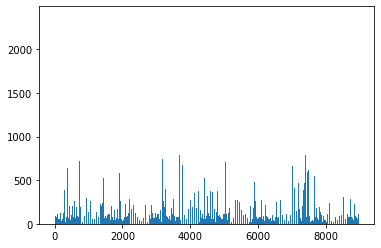

In [4]:
# bar plot in order to check each article's length
plt.bar(
    range(len(train_text)), [len(text) for text in train_text]
)

## Preprocessing

In [5]:
len([word for text in train_text for word in text])

1307239

In [6]:
len(set([word for text in train_text for word in text]))

28138

In [7]:
all_words = set([word for text in train_text for word in text]) | set([word for text in test_text for word in text])

In [8]:
len(all_words) # 30980

30980

In [9]:
# Bag of words
train_bow_text = keras.preprocessing.sequence.pad_sequences(train_text)
train_bow_text.shape #8982 row, 2376 column 
# most will be filled with 0

test_bow_text = keras.preprocessing.sequence.pad_sequences(test_text)

In [10]:
train_bow_text.shape, test_bow_text.shape # Difference with train, test size

((8982, 2376), (2246, 1032))

In [11]:
# word count 
import collections
word_count = collections.Counter()
for text in train_text :
    word_count.update(text)
for text in test_text :
    word_count.update(text)

word_count.most_common(10)

[(4, 82723),
 (5, 42393),
 (6, 40350),
 (7, 33157),
 (8, 29978),
 (9, 29956),
 (10, 29581),
 (11, 20141),
 (12, 16668),
 (13, 15224)]

In [12]:
# Using word count, Delete the word that is under 'n'
def n_cut(texts, n) :
    return np.array([[word for word in text if word_count[word] >= n ] for text in texts])

In [13]:
train_cut_text = n_cut(train_text, 20)
test_cut_text = n_cut(test_text, 20)

In [14]:
train_cut_text.shape, test_cut_text.shape

((8982,), (2246,))

In [15]:
train_cut_bow_text = keras.preprocessing.sequence.pad_sequences(train_cut_text)
test_cut_bow_text = keras.preprocessing.sequence.pad_sequences(test_cut_text)
train_cut_bow_text.shape, test_cut_bow_text.shape

((8982, 2266), (2246, 995))

In [16]:
# Set the limit length
train_cut_bow_text2 = tf.keras.preprocessing.sequence.pad_sequences(train_text, maxlen = 200)
test_cut_bow_text2 = tf.keras.preprocessing.sequence.pad_sequences(test_text, maxlen = 200)

train_cut_bow_text2.shape, test_cut_bow_text2.shape

((8982, 200), (2246, 200))

In [17]:
# One-hot encoding topic

train_onehot_topic = keras.utils.to_categorical(train_topic)
test_onehot_topic = keras.utils.to_categorical(test_topic)

train_onehot_topic.shape, test_onehot_topic.shape

((8982, 46), (2246, 46))

In [18]:
raw_labels = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
   'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
   'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
   'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
   'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

In [19]:
def topic2label(idx) :
    return raw_labels[idx]

In [20]:
print(topic2label(42))

silver


## Visualizing

In [21]:
train_bow_text.shape

(8982, 2376)

In [22]:
train_text.shape

(8982,)

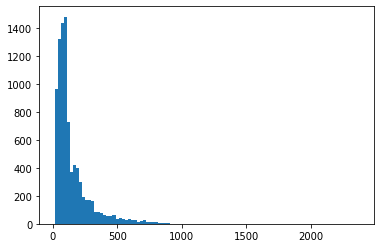

In [23]:
plt.hist( [ len(s) for s in train_text], bins=100)
plt.show()

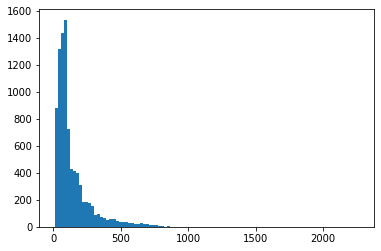

In [24]:
plt.hist([len(s) for s in train_cut_text] , bins=100)
plt.show()

In [25]:
# Check the label
import collections
# np.unique(train_topic)
collections.Counter(train_topic)

Counter({0: 55,
         1: 432,
         2: 74,
         3: 3159,
         4: 1949,
         5: 17,
         6: 48,
         7: 16,
         8: 139,
         9: 101,
         10: 124,
         11: 390,
         12: 49,
         13: 172,
         14: 26,
         15: 20,
         16: 444,
         17: 39,
         18: 66,
         19: 549,
         20: 269,
         21: 100,
         22: 15,
         23: 41,
         24: 62,
         25: 92,
         26: 24,
         27: 15,
         28: 48,
         29: 19,
         30: 45,
         31: 39,
         32: 32,
         33: 11,
         34: 50,
         35: 10,
         36: 49,
         37: 19,
         38: 19,
         39: 24,
         40: 36,
         41: 30,
         42: 13,
         43: 21,
         44: 12,
         45: 18})

In [26]:
sorted(collections.Counter(train_topic).items())[:10] # sorted -> change dictionary to list

[(0, 55),
 (1, 432),
 (2, 74),
 (3, 3159),
 (4, 1949),
 (5, 17),
 (6, 48),
 (7, 16),
 (8, 139),
 (9, 101)]

In [27]:
list(map(lambda x : x[1], sorted(collections.Counter(train_topic).items())))[:10]

[55, 432, 74, 3159, 1949, 17, 48, 16, 139, 101]

In [28]:
ct = []
for k,v in sorted(collections.Counter(train_topic).items()) :
    ct.append(v)
ct[:10]

[55, 432, 74, 3159, 1949, 17, 48, 16, 139, 101]

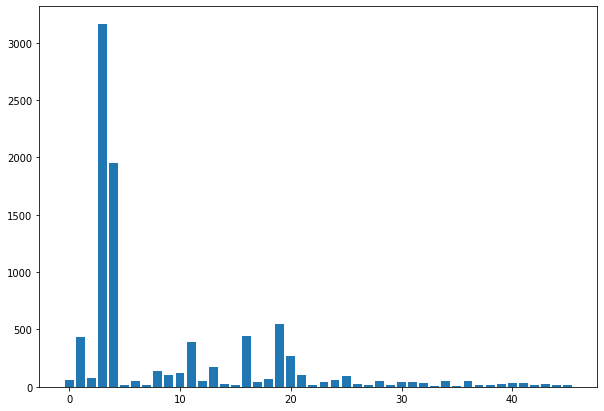

In [29]:
plt.figure(figsize=(10,7))
plt.bar(
    np.unique(train_topic), ct
)
plt.show()

In [31]:
np.unique(train_topic,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 array([  55,  432,   74, 3159, 1949,   17,   48,   16,  139,  101,  124,
         390,   49,  172,   26,   20,  444,   39,   66,  549,  269,  100,
          15,   41,   62,   92,   24,   15,   48,   19,   45,   39,   32,
          11,   50,   10,   49,   19,   19,   24,   36,   30,   13,   21,
          12,   18]))

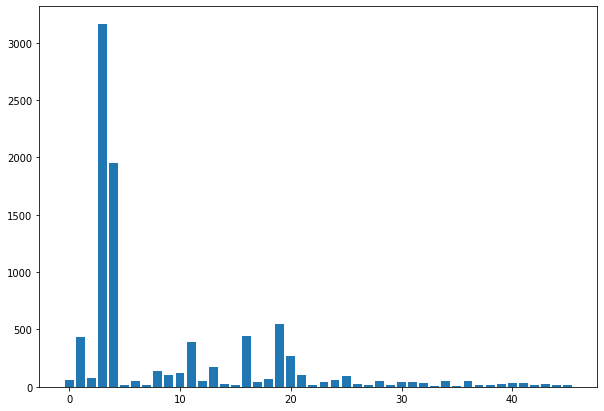

In [34]:
plt.figure(figsize=(10,7))
plt.bar( *np.unique(train_topic,return_counts=True))
plt.show()

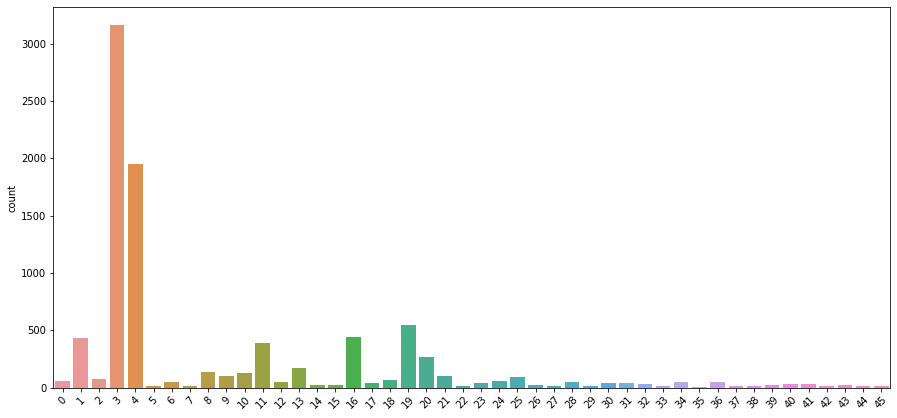

In [37]:
plt.figure(figsize=(15,7))
sns.countplot(train_topic)
plt.xticks(rotation=45)
plt.show()

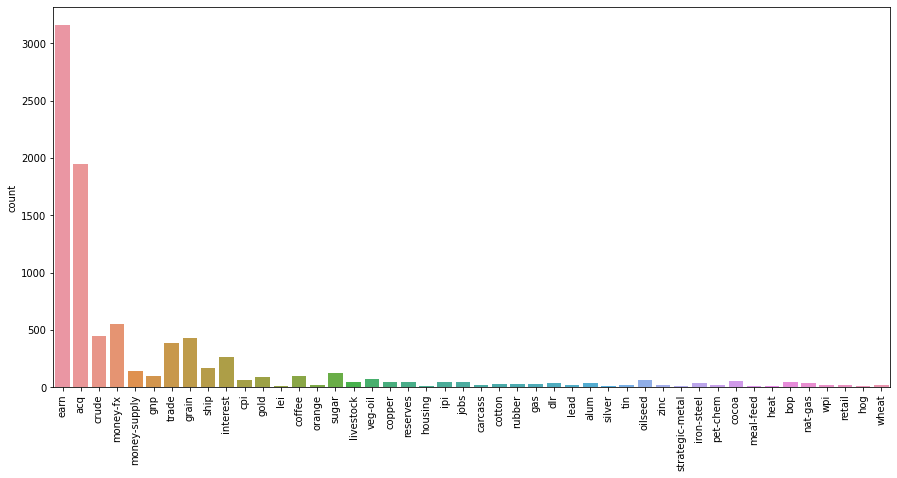

In [42]:
plt.figure(figsize=(15,7))
sns.countplot(
    list(map(lambda x : topic2label(x) ,train_topic))
)
plt.xticks(rotation=90)
plt.show()

In [53]:
# real text decoding
index_word = {y : x for x,y in keras.datasets.reuters.get_word_index().items()}

def bow2txt(bow) :
    return ' '.join([index_word[idx] for idx in bow])

In [55]:
print(len(test_text[0]))
print(test_text[0][:10])

145
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25]


In [58]:
bow2txt(test_text[1])

"the slide both their a in after london adjusted 2 contracts 54 as sales agriculture with from were vs been prices its for benefit from dlrs vs been are 2 both 97 firms deficient i geneen briefly mln briefly week operating for giving 28 in record disappointed spending shr initiative around five farmers in but 18 66 5 efforts scale will t net mln with deal from billion vs been said in after london adjusted 5 will agip it take supplies briefly mln 9 confidence on been 5 will agriculture method it in has would both administration without on been it intended figures 3 total on been 5 will 75 that in into shares net mln january in three subject for system guaranty deficient users and 381 surviving in attempt 5 higher prices producers without on been 57 request in executive in three it at china concentrate as sales priorities paris said in attempt last told showed 1 and 48 deficit be what briefly mln surviving over qtr prices today is said acres agree in one news possible be 9 1988 vs region

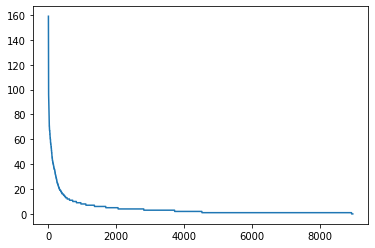

In [59]:
# the most frequence of word
plt.plot(sorted([np.unique(doc, return_counts=True)[1].argmax() for doc in train_text], reverse =True))



## Modeling

In [29]:
# 

## Pass

## Pass